# Cleaning

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [109]:
df_assurance = pd.read_csv("assurance.csv")
df_assurance = df_assurance.drop_duplicates()
df_assurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Est-ce qu’il y a des valeurs aberrantes ?

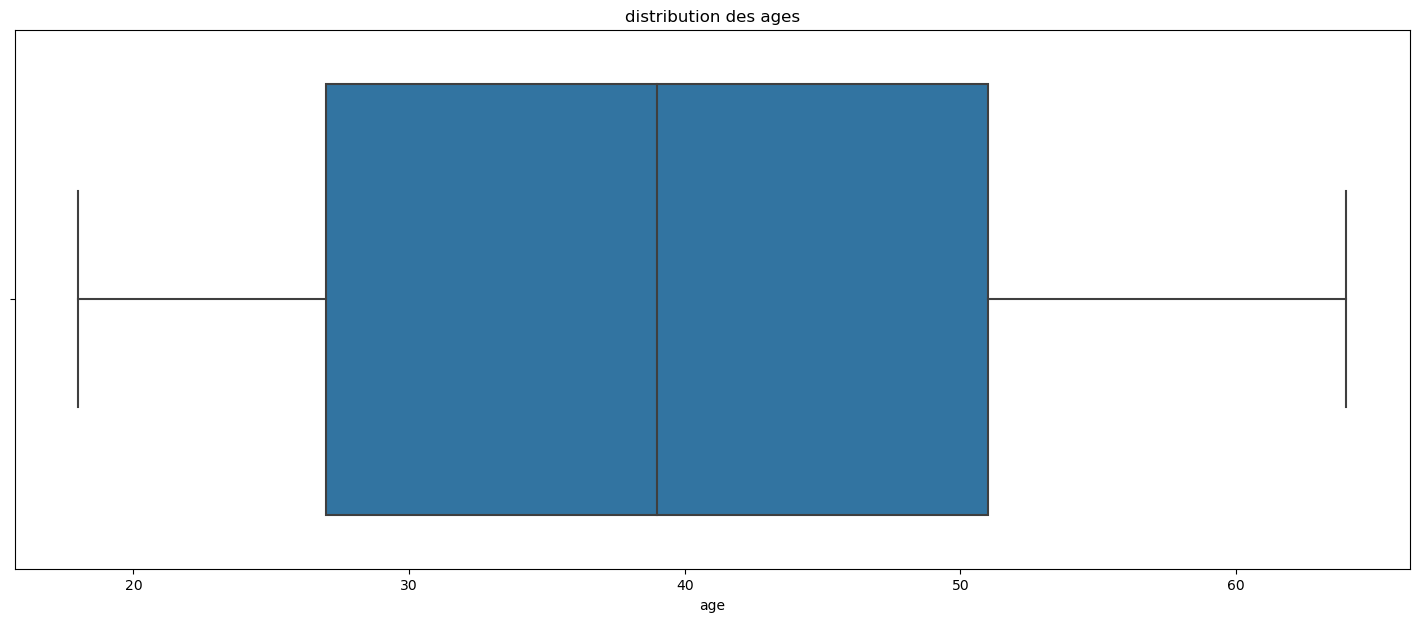

In [110]:
plt.figure(figsize=(18,7))
plt.title("distribution des ages")
sns.boxplot(data = df_assurance, x="age")
plt.show()

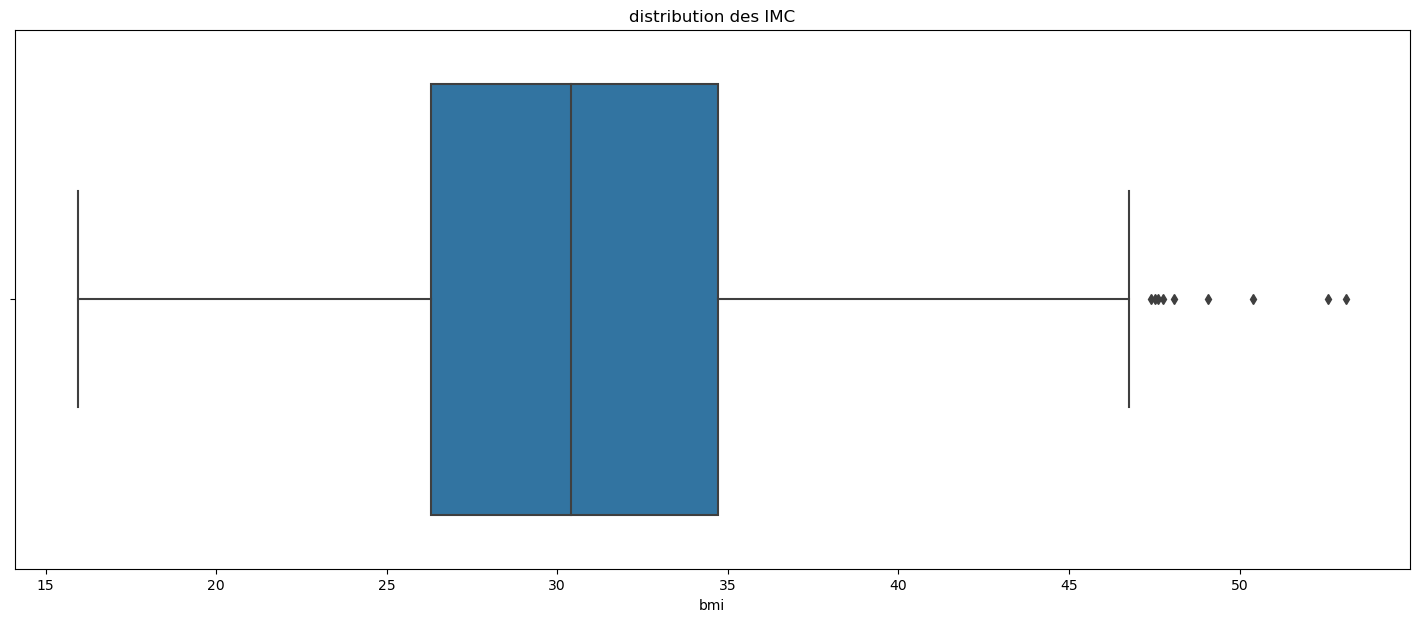

In [111]:
plt.figure(figsize=(18,7))
plt.title("distribution des IMC")
sns.boxplot(data = df_assurance, x="bmi")
plt.show()

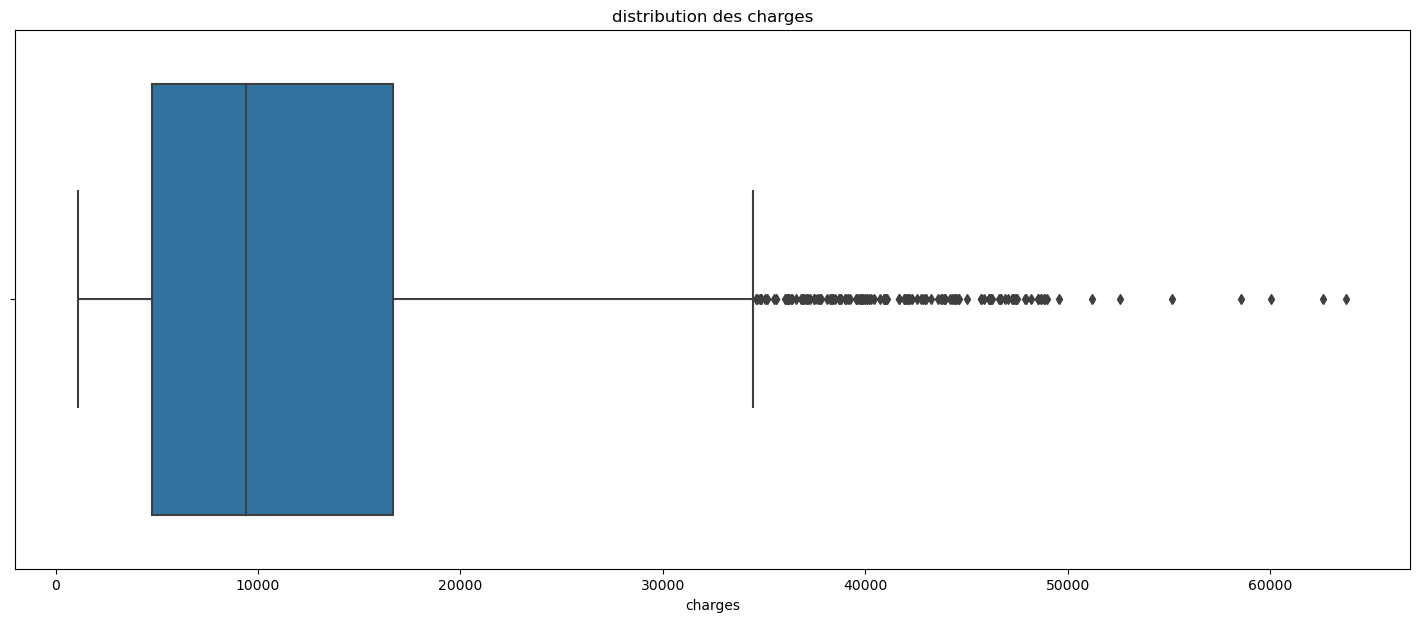

In [112]:
plt.figure(figsize=(18,7))
plt.title("distribution des charges")
sns.boxplot(data = df_assurance, x="charges")
plt.show()

In [113]:
def seuils(col):
    min = df_assurance[col].describe()[3]
    max = df_assurance[col].describe()[7]
    q1 = df_assurance[col].describe()[4]
    q3 = df_assurance[col].describe()[6]
    interQuartile = q3-q1
    seuil = 1.5*interQuartile
    seuil_min = q1-seuil
    seuil_max = q3+seuil
    return (seuil_min,min,seuil_max,max)

def print_str_outliers(col):
    (seuil_min,min,seuil_max,max) = seuils(col)
    print_inf = f"les valeurs inférieures à {seuil_min}"
    print_sup = f"les valeurs supérieurs à {round(seuil_max,2)}"
    print_fin = "seront considérées comme des valeurs aberrantes"
    if len(df_assurance[(df_assurance[col] < seuil_min)])==0 and len(df_assurance[(df_assurance[col] > seuil_max)])==0:
        print("Il n'y a pas de valeurs abberantes")
    else :
        if len(df_assurance[(df_assurance[col] < seuil_min)])!=0:
            print(print_inf, end=' ')
        if len(df_assurance[(df_assurance[col] > seuil_max)])!=0:
            print(print_sup, end=' ')
        print(print_fin)

def print_outliers(col):
    (seuil_min,min,seuil_max,max) = seuils(col)
    return df_assurance[(df_assurance[col] < seuil_min)|(df_assurance[col] > seuil_max)]

In [114]:
print_str_outliers('bmi')
print_outliers('bmi')

les valeurs supérieurs à 47.32 seront considérées comme des valeurs aberrantes


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [115]:
print_str_outliers('charges')
print_outliers('charges')

les valeurs supérieurs à 34524.78 seront considérées comme des valeurs aberrantes


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


## Effectuer des analyse bivariées (sexe et fumeur par exemple). Tu peux commencer par explorer les données avec des graphique (box plot ou violin plot avec seaborn par exemple) Tu peux valider tes hypothèse grâce à un test statistique.

### en fonction de charges

#### Attributs catégoriels

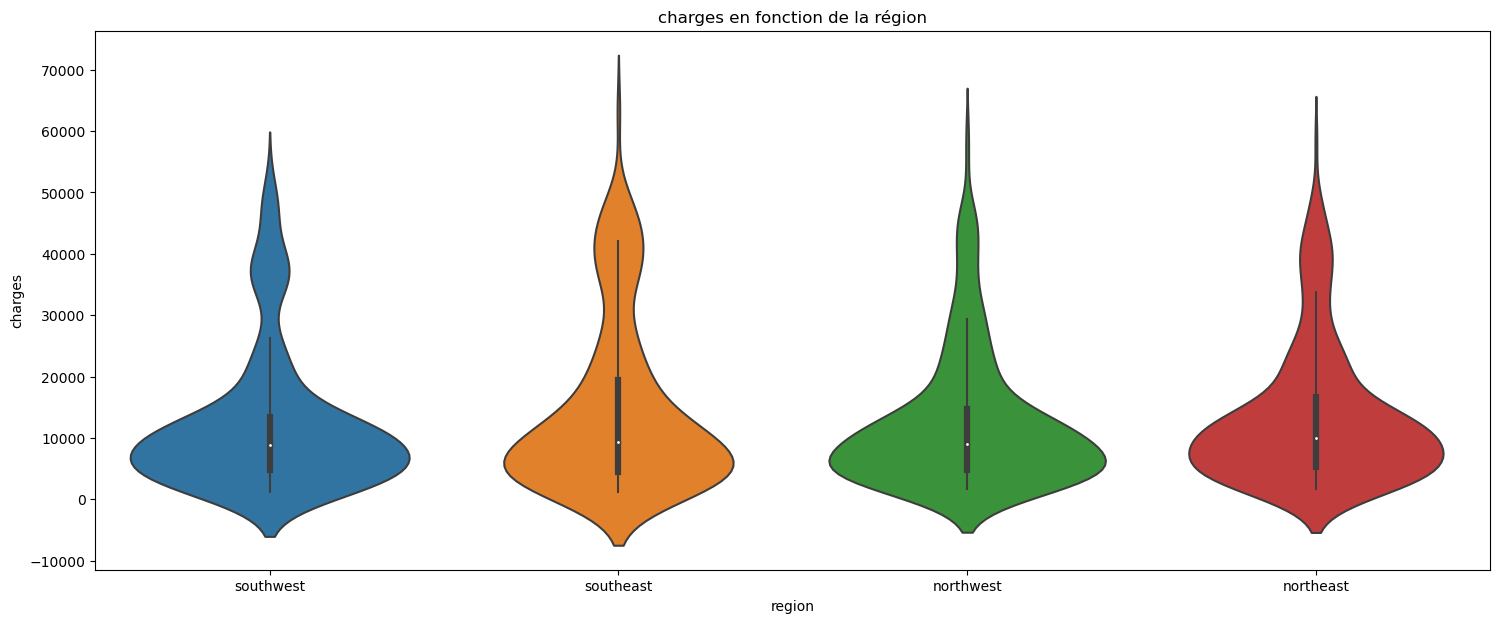

In [116]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de la région")
sns.violinplot(data = df_assurance, x="region", y="charges")
plt.show()

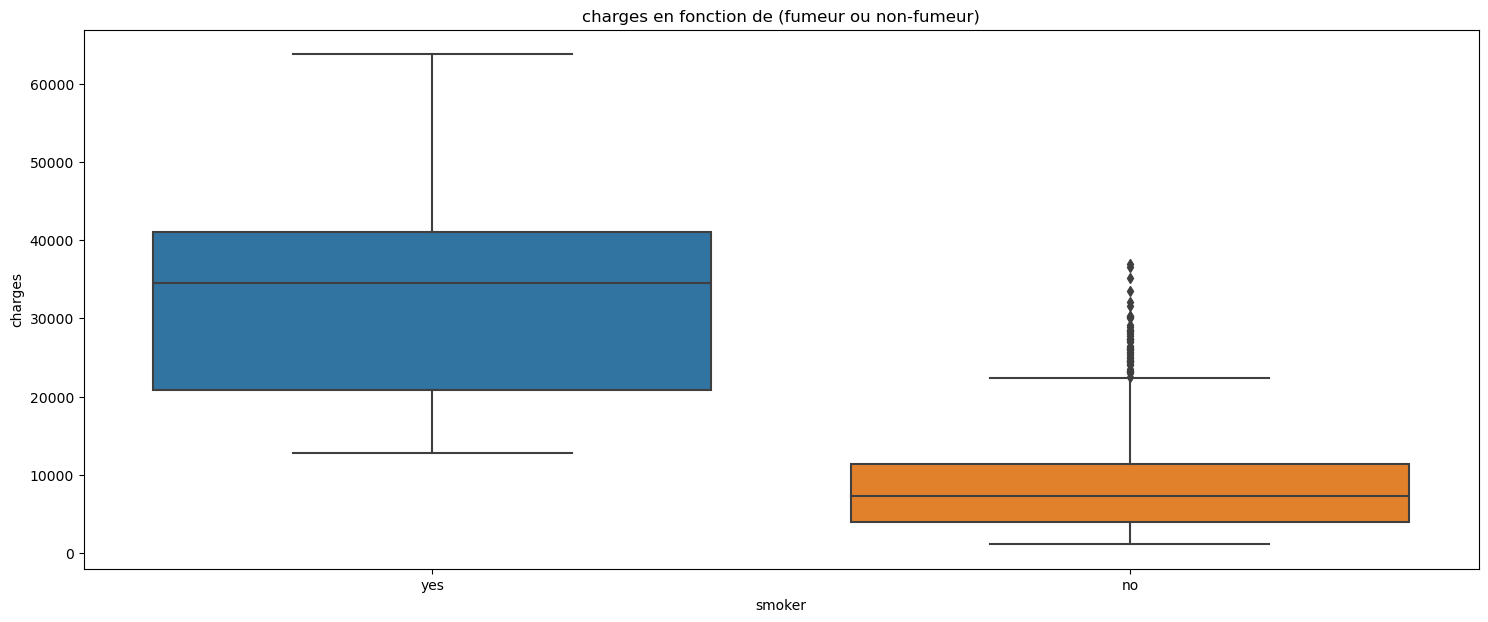

In [154]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de (fumeur ou non-fumeur)")
sns.boxplot(data = df_assurance, x="smoker", y="charges")
plt.show()

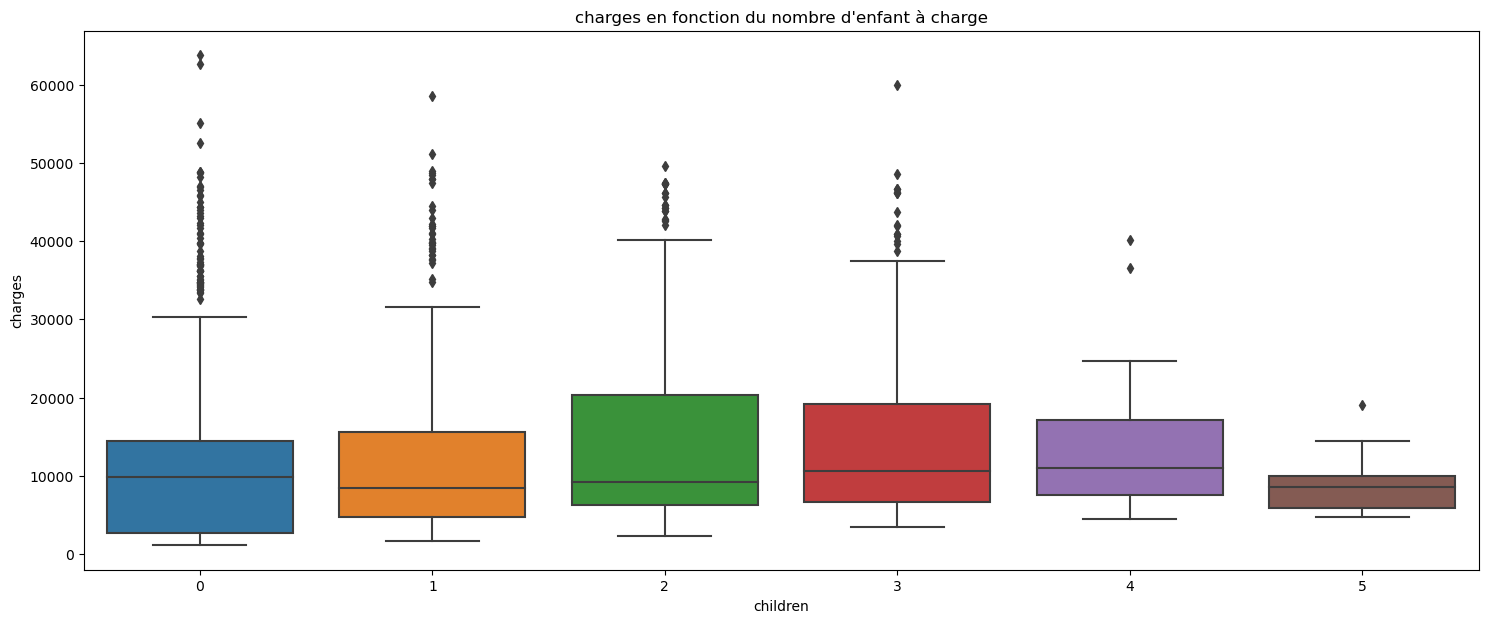

In [119]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction du nombre d'enfant à charge")
sns.boxplot(data = df_assurance, x="children", y="charges")
plt.show()

#### Attributs Quantitatifs

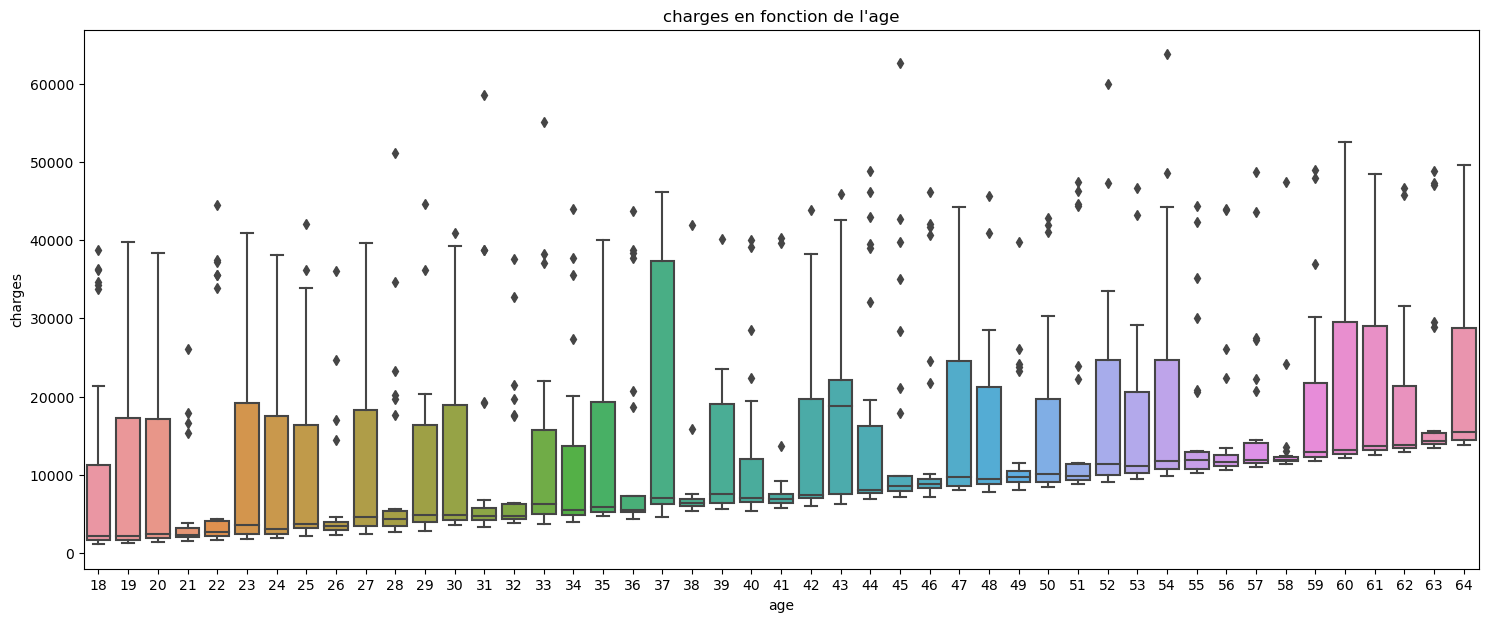

In [152]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de l'age")
sns.boxplot(data = df_assurance, x="age", y="charges")
plt.show()

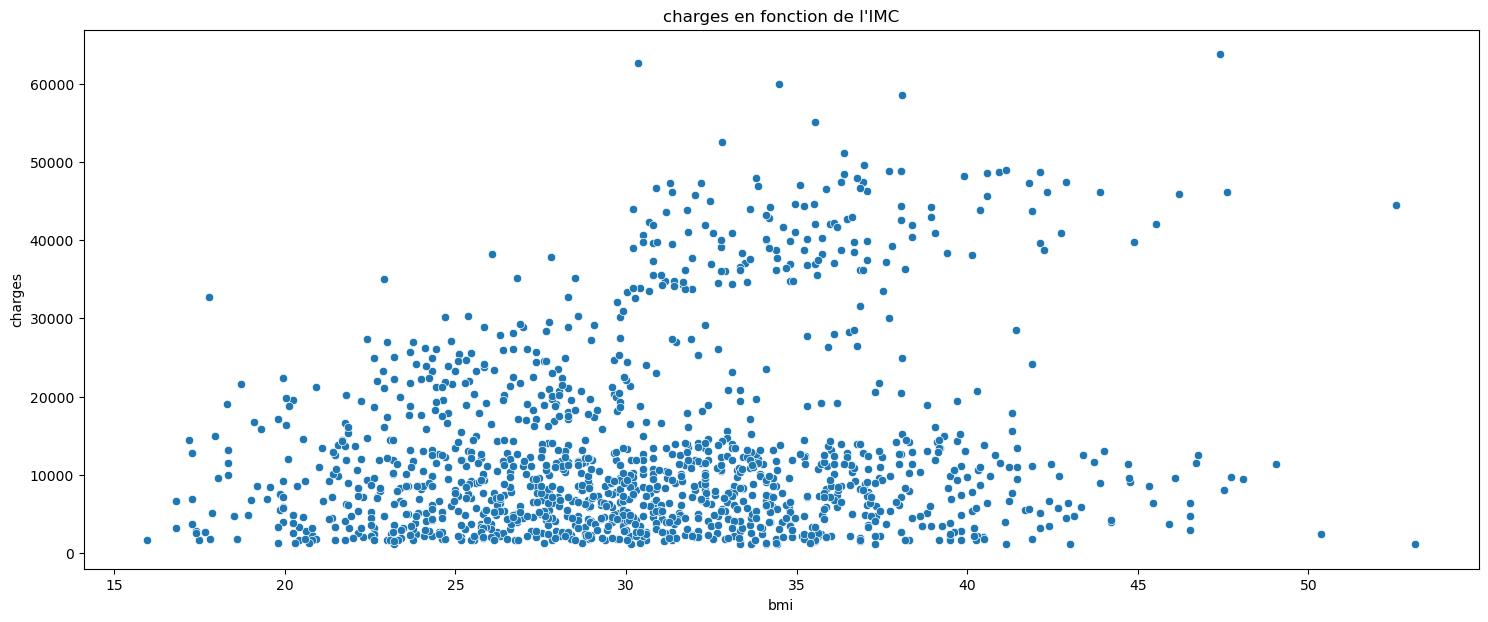

In [121]:
plt.figure(figsize=(18,7))
plt.title("charges en fonction de l'IMC")
sns.scatterplot(data = df_assurance, x="bmi", y="charges")
plt.show()

In [123]:
contingency_table = pd.crosstab(df_assurance['sex'],df_assurance['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [124]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 7.469, p-value: 0.006


In [130]:
contingency_table = pd.crosstab(df_assurance['smoker'],df_assurance['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


In [131]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 7.278, p-value: 0.064


In [136]:
contingency_table = pd.crosstab(df_assurance['children'],df_assurance['smoker'])
contingency_table

smoker,no,yes
children,,
0,458,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


In [138]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 6.873, p-value: 0.230


In [139]:
contingency_table = pd.crosstab(df_assurance['children'],df_assurance['region'])
contingency_table

region,northeast,northwest,southeast,southwest
children,,,,
0,147,131,157,138
1,77,74,95,78
2,51,66,66,57
3,39,46,35,37
4,7,6,5,7
5,3,1,6,8


In [140]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.3f}")

chi2: 13.892, p-value: 0.534


In [149]:
contingency_table = pd.crosstab(df_assurance['sex'],df_assurance['smoker'],values=df_assurance['charges'],aggfunc='mean')
contingency_table

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8099.700161,33042.005975


In [148]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"chi2: {chi2:.3f}, p-value: {p:.10f}")

chi2: 349.809, p-value: 0.0000000000
